In this notebook I am re-running all the code from the original notebook with a similar name, to use the files where missing is replaced by -1 instead of NaN or 0.
We can then compare if any of the analysis makes more sense thean earlier.

In [38]:
import pandas as pd

# Load the cleaned data
file_path = '../Kristin/cleaned_properties_-1.csv'
df = pd.read_csv(file_path)

# Define missing: NaN, -1, or 'MISSING' string (case-insensitive)
def is_missing(x):
    if pd.isna(x) or x == -1:
        return True
    if isinstance(x, str) and x.strip().upper() == 'MISSING':
        return True
    return False

# Apply to all cells
df['missing_count'] = df.astype(object).apply(lambda row: row.map(is_missing).sum(), axis=1)

# Display first few rows with missing count
print(df[['id', 'missing_count']].head(10))

# Summary statistics
print("\nSummary of missing values per row:")
print(df['missing_count'].describe())

# Rows with more than 10 missing fields
num_sparse_rows = (df['missing_count'] > 10).sum()
print(f"\nRows with more than 10 missing fields: {num_sparse_rows}")
num_sparse_rows = (df['missing_count'] > 5).sum()
print(f"\nRows with more than 5 missing fields: {num_sparse_rows}")



         id  missing_count
0  34221000              2
1   2104000              3
2  34036000              4
3  58496000              4
4  48727000              4
5  22183000              7
6  13232000              6
7  48707000              4
8  74290000              5
9  58028000              3

Summary of missing values per row:
count    75504.00000
mean         3.32540
std          2.11408
min          0.00000
25%          2.00000
50%          3.00000
75%          5.00000
max         12.00000
Name: missing_count, dtype: float64

Rows with more than 10 missing fields: 2

Rows with more than 5 missing fields: 13800


Find the rows with the highest number of missing fields.
List exactly which columns are missing in those rows.

In [39]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties_-1.csv'
df = pd.read_csv(file_path)

# Define missing: NaN, -1, or 'MISSING' string (case-insensitive)
def is_missing(x):
    if pd.isna(x) or x == -1:
        return True
    if isinstance(x, str) and x.strip().upper() == 'MISSING':
        return True
    return False

# Count missing values per row
df['missing_count'] = df.astype(object).apply(lambda row: row.map(is_missing).sum(), axis=1)

# Show basic stats
print("Summary of missing values per row:")
print(df['missing_count'].describe())

# Find the maximum number of missing fields
max_missing = df['missing_count'].max()
print(f"\nHighest number of missing fields in a row: {max_missing}")

# Get all rows that have this maximum number
most_missing_rows = df[df['missing_count'] == max_missing]

print(f"\nNumber of rows with {max_missing} missing fields: {len(most_missing_rows)}")

# Show which columns are missing for these rows
for idx, row in most_missing_rows.iterrows():
    missing_cols = [col for col in row.index if is_missing(row[col])]
    print(f"\nRow index {idx}, ID: {row.get('id', 'N/A')}")
    print("Missing columns:", missing_cols)

# Optionally, display first few for inspection
display(most_missing_rows.head())

# Example: filter a specific ID
display(df[df["id"] == 16170000])


Summary of missing values per row:
count    75504.00000
mean         3.32540
std          2.11408
min          0.00000
25%          2.00000
50%          3.00000
75%          5.00000
max         12.00000
Name: missing_count, dtype: float64

Highest number of missing fields in a row: 12

Number of rows with 12 missing fields: 2

Row index 52162, ID: 16170000
Missing columns: ['region', 'province', 'locality', 'latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income']

Row index 63124, ID: 47220000
Missing columns: ['region', 'province', 'locality', 'latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income']


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
52162,16170000,2165000,APARTMENT,FLAT_STUDIO,MISSING,MISSING,MISSING,8539,-1,-1,...,0,0,1,MISSING,-1,MISSING,MISSING,0,-1,12
63124,47220000,5095000,APARTMENT,PENTHOUSE,MISSING,MISSING,MISSING,8535,-1,-1,...,0,0,1,MISSING,-1,MISSING,MISSING,0,-1,12


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
11790,16170000,5990000,APARTMENT,APARTMENT,Wallonia,Walloon Brabant,Nivelles,1420,50,4,...,0,0,1,MISSING,-1,MISSING,MISSING,0,-1,6
52162,16170000,2165000,APARTMENT,FLAT_STUDIO,MISSING,MISSING,MISSING,8539,-1,-1,...,0,0,1,MISSING,-1,MISSING,MISSING,0,-1,12


In [40]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties_-1.csv'
df = pd.read_csv(file_path)

# Define missing: NaN, -1, or 'MISSING' string (case-insensitive)
def is_missing(x):
    if pd.isna(x) or x == -1:
        return True
    if isinstance(x, str) and x.strip().upper() == 'MISSING':
        return True
    return False

# Count missing values per row
df['missing_count'] = df.astype(object).apply(lambda row: row.map(is_missing).sum(), axis=1)

# Get unique missing counts sorted descending, top 5
top_counts = sorted(df['missing_count'].unique(), reverse=True)[:5]
print("Top 5 missing counts:", top_counts, "\n")

# Function to display rows and commonly missing columns
def display_missing_info(df, missing_count):
    rows = df[df['missing_count'] == missing_count]
    print(f"Rows with {missing_count} missing fields: {len(rows)}\n")
    
    # Compute commonly missing columns across these rows
    missing_cols_count = rows.astype(object).applymap(is_missing).sum().sort_values(ascending=False)
    commonly_missing = missing_cols_count[missing_cols_count > 0]
    
    print("Most commonly missing columns in these rows:")
    display(commonly_missing)
    
    # Display the actual rows for inspection
    display(rows)

# Loop over top_counts and display info
for count in top_counts:
    display_missing_info(df, count)


Top 5 missing counts: [np.int64(12), np.int64(10), np.int64(9), np.int64(8), np.int64(7)] 

Rows with 12 missing fields: 2

Most commonly missing columns in these rows:


/var/folders/87/3rmswg3n0_b52bj0cbkjgwjw0000gn/T/ipykernel_8001/4150668405.py:28: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



locality                          2
province                          2
region                            2
longitude                         2
surface_land_sqm                  2
latitude                          2
equipped_kitchen                  2
cadastral_income                  2
primary_energy_consumption_sqm    2
state_building                    2
heating_type                      2
epc                               2
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
52162,16170000,2165000,APARTMENT,FLAT_STUDIO,MISSING,MISSING,MISSING,8539,-1,-1,...,0,0,1,MISSING,-1,MISSING,MISSING,0,-1,12
63124,47220000,5095000,APARTMENT,PENTHOUSE,MISSING,MISSING,MISSING,8535,-1,-1,...,0,0,1,MISSING,-1,MISSING,MISSING,0,-1,12


Rows with 10 missing fields: 1

Most commonly missing columns in these rows:


/var/folders/87/3rmswg3n0_b52bj0cbkjgwjw0000gn/T/ipykernel_8001/4150668405.py:28: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



locality                          1
province                          1
region                            1
longitude                         1
latitude                          1
cadastral_income                  1
equipped_kitchen                  1
epc                               1
primary_energy_consumption_sqm    1
heating_type                      1
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
10383,26276000,16800000,HOUSE,MANOR_HOUSE,MISSING,MISSING,MISSING,4525,-1,-1,...,0,0,0,GOOD,-1,MISSING,MISSING,0,-1,10


Rows with 9 missing fields: 277

Most commonly missing columns in these rows:


/var/folders/87/3rmswg3n0_b52bj0cbkjgwjw0000gn/T/ipykernel_8001/4150668405.py:28: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



surface_land_sqm                  277
longitude                         277
latitude                          277
cadastral_income                  277
primary_energy_consumption_sqm    277
epc                               277
equipped_kitchen                  277
state_building                    277
heating_type                      277
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
70,30123000,3566000,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3520,-1,-1,...,0,0,1,MISSING,-1,MISSING,MISSING,0,-1,9
108,24067000,2802500,APARTMENT,DUPLEX,Flanders,East Flanders,Aalst,9300,-1,-1,...,0,0,0,MISSING,-1,MISSING,MISSING,1,-1,9
132,4073000,3266520,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3500,-1,-1,...,0,0,1,MISSING,-1,MISSING,MISSING,0,-1,9
136,40186000,3615000,APARTMENT,APARTMENT,Wallonia,Luxembourg,Neufchâteau,6880,-1,-1,...,0,0,1,MISSING,-1,MISSING,MISSING,0,-1,9
746,75303000,2350000,APARTMENT,APARTMENT,Flanders,Limburg,Tongeren,3700,-1,-1,...,0,0,1,MISSING,-1,MISSING,MISSING,0,-1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74418,21013000,3530000,APARTMENT,APARTMENT,Flanders,East Flanders,Sint-Niklaas,9160,-1,-1,...,0,0,1,MISSING,-1,MISSING,MISSING,0,-1,9
74477,67191000,3750000,APARTMENT,APARTMENT,Flanders,Limburg,Tongeren,3700,-1,-1,...,0,0,1,MISSING,-1,MISSING,MISSING,0,-1,9
74567,24211000,2830000,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3581,-1,-1,...,0,0,1,MISSING,-1,MISSING,MISSING,0,-1,9
75157,48291000,3350000,APARTMENT,APARTMENT,Wallonia,Hainaut,Charleroi,7180,-1,-1,...,0,0,1,MISSING,-1,MISSING,MISSING,0,-1,9


Rows with 8 missing fields: 1335



/var/folders/87/3rmswg3n0_b52bj0cbkjgwjw0000gn/T/ipykernel_8001/4150668405.py:28: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Most commonly missing columns in these rows:


latitude                          1335
longitude                         1335
cadastral_income                  1332
primary_energy_consumption_sqm    1300
epc                               1278
heating_type                      1242
equipped_kitchen                  1035
surface_land_sqm                  1028
state_building                     795
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
23,37990000,2720000,APARTMENT,APARTMENT,Flanders,Flemish Brabant,Halle-Vilvoorde,1500,-1,-1,...,0,0,1,AS_NEW,-1,MISSING,MISSING,0,-1,8
30,43150000,3208440,APARTMENT,APARTMENT,Flanders,West Flanders,Brugge,8000,-1,-1,...,0,0,0,MISSING,0,MISSING,MISSING,0,-1,8
230,73982000,2835000,APARTMENT,APARTMENT,Wallonia,Liège,Liège,4620,-1,-1,...,0,0,1,AS_NEW,-1,MISSING,MISSING,1,-1,8
258,43067000,4830000,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1200,-1,-1,...,0,0,1,AS_NEW,-1,MISSING,MISSING,0,-1,8
438,42815000,1985000,APARTMENT,APARTMENT,Wallonia,Hainaut,Soignies,7060,-1,-1,...,0,0,1,MISSING,-1,MISSING,MISSING,1,-1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75277,31235000,2790000,APARTMENT,APARTMENT,Flanders,East Flanders,Sint-Niklaas,9120,-1,-1,...,0,0,0,GOOD,-1,MISSING,MISSING,1,-1,8
75283,43758000,6950000,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1180,-1,-1,...,0,0,0,MISSING,-1,MISSING,MISSING,1,-1,8
75341,74555000,2880000,APARTMENT,APARTMENT,Flanders,Flemish Brabant,Halle-Vilvoorde,1830,-1,-1,...,0,0,1,AS_NEW,-1,MISSING,MISSING,0,-1,8
75434,50372000,2750000,APARTMENT,APARTMENT,Flanders,West Flanders,Brugge,8370,-1,-1,...,0,0,1,GOOD,-1,MISSING,MISSING,1,-1,8


Rows with 7 missing fields: 3597



/var/folders/87/3rmswg3n0_b52bj0cbkjgwjw0000gn/T/ipykernel_8001/4150668405.py:28: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Most commonly missing columns in these rows:


cadastral_income                  3557
heating_type                      3331
primary_energy_consumption_sqm    3297
epc                               3265
surface_land_sqm                  3112
equipped_kitchen                  3081
state_building                    2960
latitude                          1288
longitude                         1288
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
5,22183000,5485140,HOUSE,HOUSE,Flanders,Flemish Brabant,Halle-Vilvoorde,1700,-1,-1,...,0,0,1,AS_NEW,-1,MISSING,MISSING,0,-1,7
28,41033000,3100000,APARTMENT,PENTHOUSE,Flanders,East Flanders,Aalst,9450,50,3,...,0,0,0,MISSING,-1,MISSING,MISSING,1,-1,7
38,12568000,2706500,APARTMENT,APARTMENT,Flanders,East Flanders,Aalst,9300,50,4,...,0,0,1,MISSING,-1,MISSING,MISSING,0,-1,7
45,6574000,7950000,APARTMENT,APARTMENT,Flanders,West Flanders,Kortrijk,8500,-1,-1,...,0,0,0,MISSING,167,B,MISSING,0,-1,7
54,37326000,6600000,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1050,-1,-1,...,0,0,1,AS_NEW,-1,MISSING,MISSING,0,-1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75421,63299000,3704550,APARTMENT,APARTMENT,Wallonia,Namur,Namur,5030,-1,-1,...,0,0,1,MISSING,90,B,MISSING,0,-1,7
75429,19024000,2800000,APARTMENT,APARTMENT,Flanders,Flemish Brabant,Halle-Vilvoorde,1630,-1,-1,...,0,0,0,MISSING,-1,MISSING,FUELOIL,1,1598,7
75433,9462000,2950000,APARTMENT,APARTMENT,Flanders,East Flanders,Gent,9000,51,3,...,0,0,0,MISSING,-1,MISSING,MISSING,0,-1,7
75468,2586000,3654550,APARTMENT,APARTMENT,Wallonia,Walloon Brabant,Nivelles,1400,-1,-1,...,0,0,1,MISSING,74,A,MISSING,0,-1,7


Combined for >= 5 missing rows

In [41]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties_-1.csv'
df = pd.read_csv(file_path)

# Define missing: NaN, -1, or 'MISSING' string (case-insensitive)
def is_missing(x):
    if pd.isna(x) or x == -1:
        return True
    if isinstance(x, str) and x.strip().upper() == 'MISSING':
        return True
    return False

# Count missing values per row
df['missing_count'] = df.astype(object).apply(lambda row: row.map(is_missing).sum(), axis=1)

# Filter rows with missing_count >= 5
df_sparse = df[df['missing_count'] >= 5]
print(f"Number of rows with missing_count >= 5: {len(df_sparse)}\n")

# Count missing values per column across all these rows
missing_cols_overall = df_sparse.astype(object).applymap(is_missing).sum()
missing_cols_overall = missing_cols_overall[missing_cols_overall > 0].sort_values(ascending=False)

# Display the combined info
print("Columns missing across all rows with missing_count >= 5 (column: # missing):")
display(missing_cols_overall)


Number of rows with missing_count >= 5: 24208



/var/folders/87/3rmswg3n0_b52bj0cbkjgwjw0000gn/T/ipykernel_8001/101669282.py:23: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Columns missing across all rows with missing_count >= 5 (column: # missing):


cadastral_income                  23270
primary_energy_consumption_sqm    20186
epc                               19360
heating_type                      18830
surface_land_sqm                  16744
equipped_kitchen                  15146
state_building                    14169
latitude                           7120
longitude                          7120
locality                              3
region                                3
province                              3
dtype: int64

In [42]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties_-1.csv'
df = pd.read_csv(file_path)

# Define missing: NaN, -1, or 'MISSING' string (case-insensitive)
def is_missing(x):
    if pd.isna(x) or x == -1:
        return True
    if isinstance(x, str) and x.strip().upper() == 'MISSING':
        return True
    return False

# Count missing values per row
df['missing_count'] = df.astype(object).apply(lambda row: row.map(is_missing).sum(), axis=1)

# Filter rows with missing_count >= 4
df_sparse = df[df['missing_count'] >= 4]
print(f"Number of rows with missing_count >= 4: {len(df_sparse)}\n")

# Count missing values per column across all these rows
missing_cols_overall = df_sparse.astype(object).applymap(is_missing).sum()
missing_cols_overall = missing_cols_overall[missing_cols_overall > 0].sort_values(ascending=False)

# Display the combined info
print("Columns missing across all rows with missing_count >= 4 (column: # missing):")
display(missing_cols_overall)


Number of rows with missing_count >= 4: 33897



/var/folders/87/3rmswg3n0_b52bj0cbkjgwjw0000gn/T/ipykernel_8001/1549931871.py:23: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Columns missing across all rows with missing_count >= 4 (column: # missing):


cadastral_income                  30929
primary_energy_consumption_sqm    24149
heating_type                      23599
epc                               22735
surface_land_sqm                  22294
equipped_kitchen                  19848
state_building                    17967
latitude                           9590
longitude                          9590
locality                              3
region                                3
province                              3
dtype: int64

- How many observations and features/columns do you have?
  75511 observations & 30 columns 

In [43]:
# calculate numnber of observations and features/columns

import pandas as pd

# Load the raw data file
file_path = '../data/raw/immoweb_data.csv'  # update path if needed

# --- 1. Auto-detect separator ---
with open(file_path, 'r', encoding='utf-8') as f:
    first_line = f.readline()
    sep = ';' if ';' in first_line else ','
# print("Detected separator:", repr(sep))

# --- 2. Load CSV using detected separator ---
df_raw = pd.read_csv(file_path, sep=sep, dtype={"id": str}, low_memory=False)

# --- 3. Overview ---
num_rows, num_cols = df_raw.shape
print(f"Number of observations (rows): {num_rows}")
print(f"Number of features (columns): {num_cols}\n")

# print("Columns in the raw dataset:")
# print(df_raw.columns.tolist())

# print("\nPreview of raw data:")
# display(df_raw.head())

Number of observations (rows): 75511
Number of features (columns): 30



- What is the proportion of missing values per column?

In [44]:
import pandas as pd

# Load the raw data file
file_path = '../data/raw/immoweb_data.csv'  # update path if needed

# --- 1. Auto-detect separator ---
with open(file_path, 'r', encoding='utf-8') as f:
    first_line = f.readline()
    sep = ';' if ';' in first_line else ','

# --- 2. Load CSV using detected separator ---
df_raw = pd.read_csv(file_path, sep=sep, dtype={"id": str}, low_memory=False)

# --- 3. Overview of dataset ---
num_rows, num_cols = df_raw.shape
print(f"Number of observations (rows): {num_rows}")
print(f"Number of features (columns): {num_cols}\n")

# --- 4. Define custom missing values ---
def is_missing(x):
    if pd.isna(x) or x == -1:
        return True
    if isinstance(x, str) and x.strip().upper() == 'MISSING':
        return True
    return False

# --- 5. Proportion of missing values per column (including -1 and 'MISSING') ---
missing_percent = df_raw.astype(object).applymap(is_missing).mean() * 100
print("Proportion of missing values per column (% including -1 and 'MISSING'):")
display(missing_percent.sort_values(ascending=False))


Number of observations (rows): 75511
Number of features (columns): 30



/var/folders/87/3rmswg3n0_b52bj0cbkjgwjw0000gn/T/ipykernel_8001/147839385.py:28: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Proportion of missing values per column (% including -1 and 'MISSING'):


cadastral_income                  59.550264
surface_land_sqm                  48.014197
construction_year                 44.220047
equipped_kitchen                  43.731377
heating_type                      41.641615
state_building                    35.283601
primary_energy_consumption_sqm    35.184278
nbr_frontages                     34.890281
epc                               31.787422
longitude                         18.670128
latitude                          18.670128
terrace_sqm                       17.401438
total_area_sqm                    10.084623
garden_sqm                         3.892148
region                             0.003973
locality                           0.003973
province                           0.003973
zip_code                           0.000000
price                              0.000000
id                                 0.000000
subproperty_type                   0.000000
property_type                      0.000000
fl_garden                       

Proportion of missing values per column (%):
cadastral_income                  59.550264
surface_land_sqm                  48.014197
construction_year                 44.220047
primary_energy_consumption_sqm    35.182953
nbr_frontages                     34.890281
longitude                         18.670128
latitude                          18.670128
terrace_sqm                       17.401438
total_area_sqm                    10.084623
garden_sqm                         3.892148
province                           0.000000
region                             0.000000
subproperty_type                   0.000000
property_type                      0.000000
zip_code                           0.000000
locality                           0.000000
id                                 0.000000
price                              0.000000
fl_open_fire                       0.000000
fl_furnished                       0.000000
nbr_bedrooms                       0.000000
equipped_kitchen                   0.000000
fl_garden                          0.000000
fl_terrace                         0.000000
fl_floodzone                       0.000000
fl_swimming_pool                   0.000000
state_building                     0.000000
epc                                0.000000
heating_type                       0.000000
fl_double_glazing                  0.000000

- Which variables would you delete and why?

In [45]:
# --- 1. Define custom missing values ---
def is_missing(x):
    if pd.isna(x) or x == -1:
        return True
    if isinstance(x, str) and x.strip().upper() == 'MISSING':
        return True
    return False

# --- 2. Compute missing proportion per column (including -1 and 'MISSING') ---
missing_percent = df_raw.astype(object).applymap(is_missing).mean() * 100

# --- 3. Threshold for dropping columns ---
threshold = 30  # percentage

# Columns with more than threshold % missing values
columns_to_drop = missing_percent[missing_percent > threshold].sort_values(ascending=False)
print("Columns with >30% missing values:")
display(columns_to_drop)

# Suggested columns to keep
columns_to_keep = missing_percent[missing_percent <= threshold].sort_values(ascending=False)
print("\nColumns with <=30% missing values (recommended to keep):")
display(columns_to_keep)


/var/folders/87/3rmswg3n0_b52bj0cbkjgwjw0000gn/T/ipykernel_8001/1428892704.py:10: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Columns with >30% missing values:


cadastral_income                  59.550264
surface_land_sqm                  48.014197
construction_year                 44.220047
equipped_kitchen                  43.731377
heating_type                      41.641615
state_building                    35.283601
primary_energy_consumption_sqm    35.184278
nbr_frontages                     34.890281
epc                               31.787422
dtype: float64


Columns with <=30% missing values (recommended to keep):


latitude             18.670128
longitude            18.670128
terrace_sqm          17.401438
total_area_sqm       10.084623
garden_sqm            3.892148
region                0.003973
province              0.003973
locality              0.003973
id                    0.000000
subproperty_type      0.000000
property_type         0.000000
price                 0.000000
zip_code              0.000000
fl_furnished          0.000000
nbr_bedrooms          0.000000
fl_terrace            0.000000
fl_open_fire          0.000000
fl_garden             0.000000
fl_swimming_pool      0.000000
fl_floodzone          0.000000
fl_double_glazing     0.000000
dtype: float64

In [46]:
# --- 1. Define custom missing values ---
def is_missing(x):
    if pd.isna(x) or x == -1:
        return True
    if isinstance(x, str) and x.strip().upper() == 'MISSING':
        return True
    return False

# --- 2. Standardize property type ---
df['property_type'] = df['property_type'].astype(str).str.lower().str.strip()

# --- 3. Loop over each property type and calculate missing percentages ---
for ptype in df['property_type'].dropna().unique():
    print(f"\n--- Missing values for property type: {ptype.upper()} ---")
    subset = df[df['property_type'] == ptype]
    missing_pct = subset.astype(object).applymap(is_missing).mean() * 100
    missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
    print(missing_pct.round(3))



--- Missing values for property type: APARTMENT ---


/var/folders/87/3rmswg3n0_b52bj0cbkjgwjw0000gn/T/ipykernel_8001/4166901015.py:16: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



surface_land_sqm                  100.000
cadastral_income                   74.251
heating_type                       48.510
primary_energy_consumption_sqm     44.077
equipped_kitchen                   43.148
epc                                40.891
state_building                     40.003
latitude                           16.257
longitude                          16.257
locality                            0.006
region                              0.006
province                            0.006
dtype: float64

--- Missing values for property type: HOUSE ---


/var/folders/87/3rmswg3n0_b52bj0cbkjgwjw0000gn/T/ipykernel_8001/4166901015.py:16: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



cadastral_income                  45.967
equipped_kitchen                  44.273
heating_type                      35.298
state_building                    30.924
primary_energy_consumption_sqm    26.973
epc                               23.381
latitude                          20.900
longitude                         20.900
locality                           0.003
region                             0.003
province                           0.003
dtype: float64


In [47]:
# Custom function to identify missing values
def is_missing(x):
    if pd.isna(x) or x == -1:
        return True
    if isinstance(x, str) and x.strip().upper() == 'MISSING':
        return True
    return False

# Dimensions
print(df.shape)

# Data types
print(df.dtypes)

# Summary statistics (numeric)
display(df.describe().T)

# Quick look at categorical variables
display(df.describe(include='object').T)

# Adapted missing values (including -1 and 'MISSING')
missing_percent = df.astype(object).applymap(is_missing).mean() * 100
display(missing_percent.sort_values(ascending=False).round(3))


(75504, 31)
id                                 int64
price                              int64
property_type                     object
subproperty_type                  object
region                            object
province                          object
locality                          object
zip_code                           int64
latitude                           int64
longitude                          int64
construction_year                  int64
total_area_sqm                     int64
surface_land_sqm                   int64
nbr_frontages                      int64
nbr_bedrooms                       int64
equipped_kitchen                  object
fl_furnished                       int64
fl_open_fire                       int64
fl_terrace                         int64
terrace_sqm                        int64
fl_garden                          int64
garden_sqm                         int64
fl_swimming_pool                   int64
fl_floodzone                       int64
stat

,count,mean,std,min,25%,50%,75%,max
id,75504.0,3.973212e+07,2.290421e+07,0.0,19894250.0,39721500.0,59541000.0,79485000.0
price,75504.0,4.227615e+06,4.383481e+06,760000.0,2420000.0,3290000.0,4550000.0,225000000.0
zip_code,75504.0,5.144677e+03,3.005437e+03,1000.0,2240.0,4683.0,8370.0,9992.0
latitude,75504.0,4.079299e+01,2.003049e+01,-1.0,50.0,50.0,51.0,52.0
longitude,75504.0,2.936176e+00,2.080692e+00,-80.0,3.0,4.0,4.0,6.0
construction_year,75504.0,1.106951e+03,9.860399e+02,0.0,0.0,1930.0,2003.0,2024.0
total_area_sqm,75504.0,1.471700e+02,3.974112e+02,0.0,82.0,117.0,177.0,88140.0
surface_land_sqm,75504.0,6.010954e+02,7.317923e+03,-1.0,-1.0,0.0,384.0,950774.0
nbr_frontages,75504.0,1.824976e+00,1.516467e+00,0.0,0.0,2.0,3.0,47.0
nbr_bedrooms,75504.0,2.787362e+00,1.894224e+00,0.0,2.0,3.0,3.0,200.0


,count,unique,top,freq
property_type,75504,2,house,39254
subproperty_type,75504,23,HOUSE,29729
region,75504,4,Flanders,43420
province,75504,12,West Flanders,11795
locality,75504,44,Brussels,7955
equipped_kitchen,75504,9,MISSING,33020
state_building,75504,7,MISSING,26640
epc,75504,10,MISSING,24001
heating_type,75504,8,GAS,31871


/var/folders/87/3rmswg3n0_b52bj0cbkjgwjw0000gn/T/ipykernel_8001/1312417620.py:22: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



cadastral_income                  59.547
surface_land_sqm                  48.011
equipped_kitchen                  43.733
heating_type                      41.642
state_building                    35.283
primary_energy_consumption_sqm    35.185
epc                               31.788
latitude                          18.671
longitude                         18.671
province                           0.004
locality                           0.004
region                             0.004
id                                 0.000
subproperty_type                   0.000
property_type                      0.000
nbr_bedrooms                       0.000
nbr_frontages                      0.000
total_area_sqm                     0.000
construction_year                  0.000
zip_code                           0.000
price                              0.000
fl_open_fire                       0.000
fl_furnished                       0.000
fl_swimming_pool                   0.000
garden_sqm      

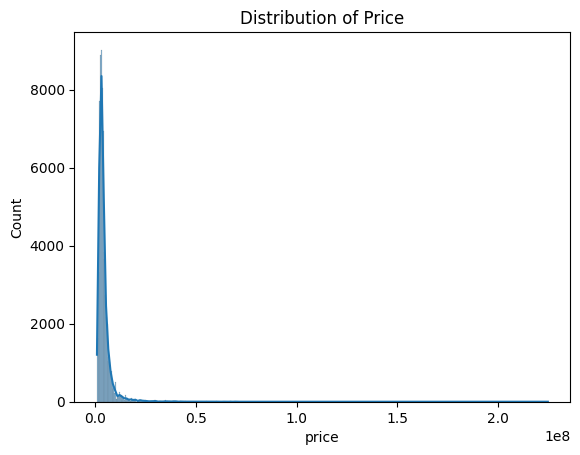

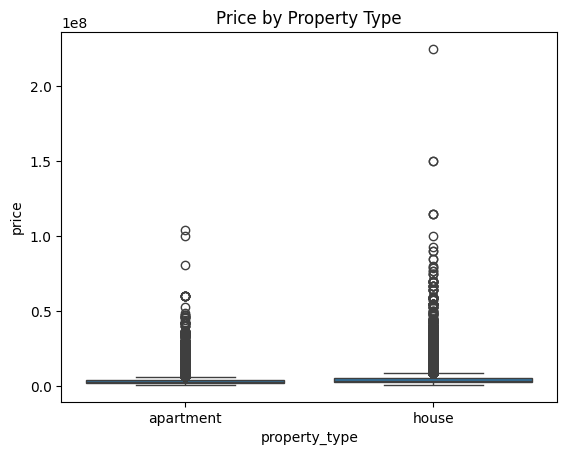

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric example
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

# Boxplot example
sns.boxplot(x='property_type', y='price', data=df)
plt.title('Price by Property Type')
plt.show()


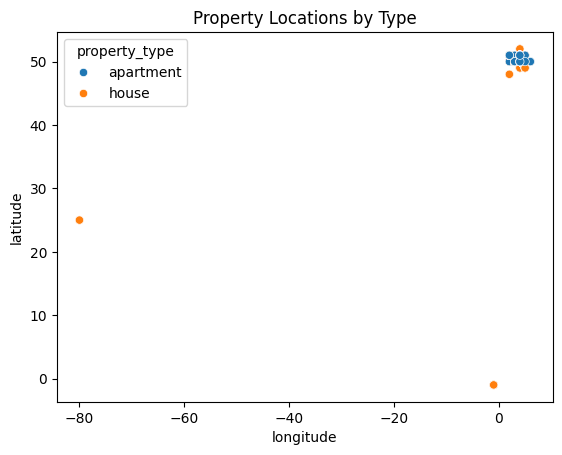

In [49]:
sns.scatterplot(x='longitude', y='latitude', hue='property_type', data=df)
plt.title('Property Locations by Type')
plt.show()


,id,price,zip_code,latitude,longitude,construction_year,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,...,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,primary_energy_consumption_sqm,fl_double_glazing,cadastral_income,missing_count
id,1.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.01,...,0.01,0.01,0.01,-0.01,-0.00,-0.01,-0.00,0.00,0.00,-0.00
price,0.00,1.00,-0.04,-0.11,-0.13,0.09,0.19,0.13,0.10,0.35,...,0.03,0.09,0.03,0.09,0.20,-0.06,-0.00,0.00,0.00,0.01
zip_code,-0.00,-0.04,1.00,0.07,-0.13,-0.05,-0.02,0.00,-0.13,0.00,...,-0.13,-0.05,-0.08,-0.01,-0.02,-0.07,0.00,-0.04,0.00,0.05
latitude,-0.00,-0.11,0.07,1.00,0.90,0.09,-0.05,-0.03,-0.07,-0.06,...,-0.01,-0.03,-0.03,-0.03,-0.05,-0.16,-0.00,-0.01,-0.01,-0.31
longitude,-0.00,-0.13,-0.13,0.90,1.00,0.06,-0.03,-0.02,0.00,-0.03,...,0.02,-0.01,0.02,-0.02,-0.04,-0.08,-0.00,0.02,-0.01,-0.33
construction_year,0.00,0.09,-0.05,0.09,0.06,1.00,0.01,-0.00,0.11,0.01,...,0.12,0.04,0.08,0.01,0.05,-0.29,-0.00,0.16,0.00,-0.19
total_area_sqm,0.00,0.19,-0.02,-0.05,-0.03,0.01,1.00,0.05,0.08,0.19,...,0.00,0.03,0.04,0.04,0.06,-0.00,0.00,0.02,0.00,-0.05
surface_land_sqm,-0.00,0.13,0.00,-0.03,-0.02,-0.00,0.05,1.00,0.07,0.09,...,-0.02,0.01,0.02,0.16,0.05,0.00,0.00,-0.00,0.00,-0.03
nbr_frontages,0.00,0.10,-0.13,-0.07,0.00,0.11,0.08,0.07,1.00,0.20,...,0.10,0.06,0.23,0.08,0.12,-0.04,-0.00,0.09,0.00,-0.31
nbr_bedrooms,0.01,0.35,0.00,-0.06,-0.03,0.01,0.19,0.09,0.20,1.00,...,-0.03,0.04,0.14,0.07,0.09,-0.01,0.00,0.02,0.00,-0.18


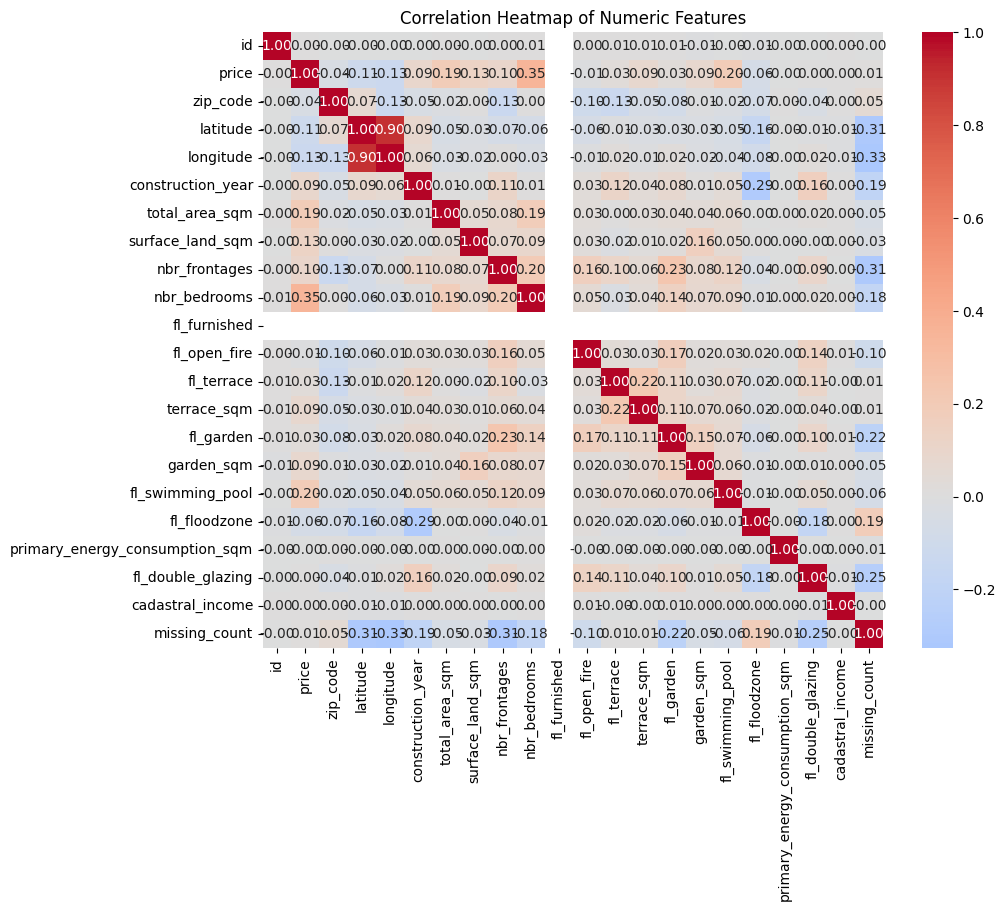

In [50]:
import pandas as pd

# Select numeric columns only
numeric_cols = df.select_dtypes(include='number').columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Round for readability
corr_matrix_rounded = corr_matrix.round(2)

# Display as table
display(corr_matrix_rounded)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


,id,price,construction_year,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,fl_open_fire,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,primary_energy_consumption_sqm,fl_double_glazing,cadastral_income,missing_count
id,1.00,0.00,0.00,0.00,-0.00,0.00,0.01,0.00,0.01,0.01,0.01,-0.01,-0.00,-0.01,-0.00,0.00,0.00,-0.00
price,0.00,1.00,0.09,0.19,0.13,0.10,0.35,-0.01,0.03,0.09,0.03,0.09,0.20,-0.06,-0.00,0.00,0.00,0.01
construction_year,0.00,0.09,1.00,0.01,-0.00,0.11,0.01,0.03,0.12,0.04,0.08,0.01,0.05,-0.29,-0.00,0.16,0.00,-0.19
total_area_sqm,0.00,0.19,0.01,1.00,0.05,0.08,0.19,0.03,0.00,0.03,0.04,0.04,0.06,-0.00,0.00,0.02,0.00,-0.05
surface_land_sqm,-0.00,0.13,-0.00,0.05,1.00,0.07,0.09,0.03,-0.02,0.01,0.02,0.16,0.05,0.00,0.00,-0.00,0.00,-0.03
nbr_frontages,0.00,0.10,0.11,0.08,0.07,1.00,0.20,0.16,0.10,0.06,0.23,0.08,0.12,-0.04,-0.00,0.09,0.00,-0.31
nbr_bedrooms,0.01,0.35,0.01,0.19,0.09,0.20,1.00,0.05,-0.03,0.04,0.14,0.07,0.09,-0.01,0.00,0.02,0.00,-0.18
fl_open_fire,0.00,-0.01,0.03,0.03,0.03,0.16,0.05,1.00,0.03,0.03,0.17,0.02,0.03,0.02,-0.00,0.14,0.01,-0.10
fl_terrace,0.01,0.03,0.12,0.00,-0.02,0.10,-0.03,0.03,1.00,0.22,0.11,0.03,0.07,-0.02,-0.00,0.11,-0.00,0.01
terrace_sqm,0.01,0.09,0.04,0.03,0.01,0.06,0.04,0.03,0.22,1.00,0.11,0.07,0.06,-0.02,-0.00,0.04,-0.00,0.01


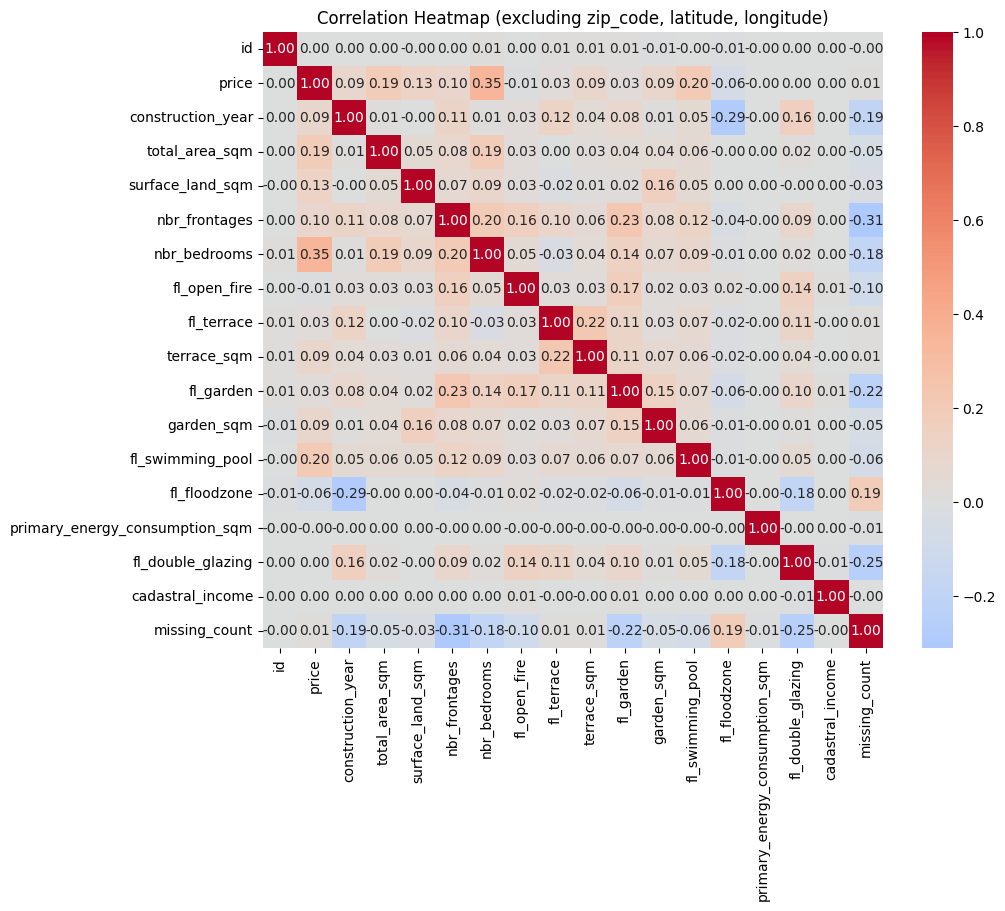

In [51]:
# Keep only columns with more than 1 unique value
numeric_cols = [col for col in df.select_dtypes(include='number').columns
                if df[col].nunique() > 1 and col not in ['zip_code', 'latitude', 'longitude']]

corr_matrix = df[numeric_cols].corr().round(2)
display(corr_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (excluding zip_code, latitude, longitude)')
plt.show()


In [52]:
import pandas as pd
import numpy as np

# Select numeric columns (excluding location columns)
numeric_cols = [col for col in df.select_dtypes(include='number').columns
                if col not in ['zip_code', 'latitude', 'longitude', 'missing_count']]

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Flatten the matrix, keep only one triangle (no duplicates)
corr_pairs = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Sort by absolute correlation descending
corr_pairs['abs_corr'] = corr_pairs['Correlation'].abs()
corr_pairs_sorted = corr_pairs.sort_values('abs_corr', ascending=False).drop(columns='abs_corr')

# Display
display(corr_pairs_sorted)


,Feature 1,Feature 2,Correlation
20,price,nbr_bedrooms,0.352456
41,construction_year,fl_floodzone,-0.286847
74,nbr_frontages,fl_garden,0.233936
100,fl_terrace,terrace_sqm,0.224395
70,nbr_frontages,nbr_bedrooms,0.200351
...,...,...,...
80,nbr_frontages,cadastral_income,0.000065
14,id,fl_double_glazing,0.000059
123,garden_sqm,primary_energy_consumption_sqm,-0.000014
1,id,construction_year,0.000006


heating_type
GAS         31871
MISSING     31441
FUELOIL      7711
ELECTRIC     3621
PELLET        499
WOOD          147
SOLAR         134
CARBON         80
Name: count, dtype: int64

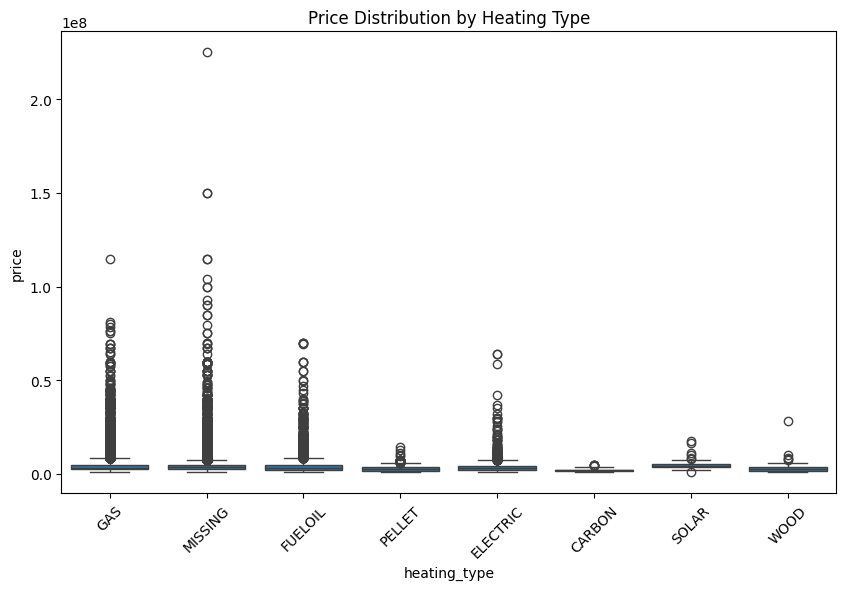

price                   total_area_sqm        nbr_bedrooms  \
                   mean     median  count           mean median         mean   
heating_type                                                                   
CARBON        1987937.4  1995000.0     80          128.0  105.0          2.4   
ELECTRIC      3559096.7  2940000.0   3621          115.7   97.0          2.4   
FUELOIL       4281676.1  3250000.0   7711          209.1  171.0          3.6   
GAS           4262103.5  3190000.0  31871          147.0  120.0          2.8   
MISSING       4290243.3  3431750.0  31441          135.7  106.0          2.6   
PELLET        2720002.5  2350000.0    499          150.2  132.0          2.9   
SOLAR         4762168.4  4370000.0    134          137.9  128.0          2.7   
WOOD          2835619.0  2450000.0    147          156.7  137.0          3.0   

                    primary_energy_consumption_sqm         
             median                           mean median  
heating_type                                               
CARBON          2.0                          415.9  301.5  
ELECTRIC        2.0                         5905.9  238.0  
FUELOIL         3.0                         1013.8  354.0  
GAS             3.0                          896.8  165.0  
MISSING         2.0                          780.7   -1.0  
PELLET          3.0                          374.3  312.0  
SOLAR           3.0                           11.5   -1.0  
WOOD            3.0                          511.4  449.0

In [53]:
# Count of each heating type
heating_counts = df['heating_type'].value_counts(dropna=False)
display(heating_counts)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='heating_type', y='price', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Heating Type')
plt.show()

summary_heating = df.groupby('heating_type').agg({
    'price': ['mean', 'median', 'count'],
    'total_area_sqm': ['mean', 'median'],
    'nbr_bedrooms': ['mean', 'median'],
    'primary_energy_consumption_sqm': ['mean', 'median']
}).round(1)

display(summary_heating)


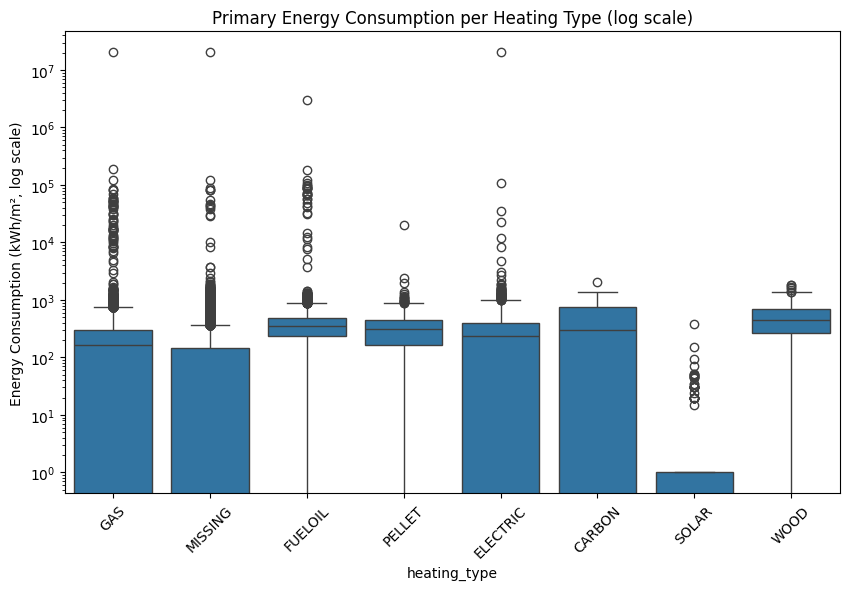

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='heating_type', y='primary_energy_consumption_sqm', data=df)
plt.yscale('log')  # use log scale to compress extreme values
plt.xticks(rotation=45)
plt.title('Primary Energy Consumption per Heating Type (log scale)')
plt.ylabel('Energy Consumption (kWh/m², log scale)')
plt.show()



FRI 14 Nov
EDA

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

df = pd.read_csv("../Kristin/cleaned_properties_-1.csv")

# QUICK CHECKS
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75504 entries, 0 to 75503
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              75504 non-null  int64 
 1   price                           75504 non-null  int64 
 2   property_type                   75504 non-null  object
 3   subproperty_type                75504 non-null  object
 4   region                          75504 non-null  object
 5   province                        75504 non-null  object
 6   locality                        75504 non-null  object
 7   zip_code                        75504 non-null  int64 
 8   latitude                        75504 non-null  int64 
 9   longitude                       75504 non-null  int64 
 10  construction_year               75504 non-null  int64 
 11  total_area_sqm                  75504 non-null  int64 
 12  surface_land_sqm                75504 non-null

id                                0
price                             0
property_type                     0
subproperty_type                  0
region                            0
province                          0
locality                          0
zip_code                          0
latitude                          0
longitude                         0
construction_year                 0
total_area_sqm                    0
surface_land_sqm                  0
nbr_frontages                     0
nbr_bedrooms                      0
equipped_kitchen                  0
fl_furnished                      0
fl_open_fire                      0
fl_terrace                        0
terrace_sqm                       0
fl_garden                         0
garden_sqm                        0
fl_swimming_pool                  0
fl_floodzone                      0
state_building                    0
primary_energy_consumption_sqm    0
epc                               0
heating_type                

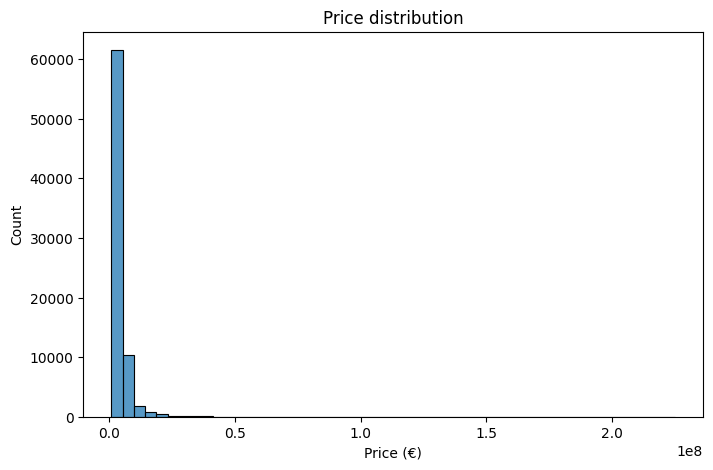

In [56]:
# PRICE DISTRIBUTION
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=50)
plt.xlabel("Price (€)")
plt.title("Price distribution")
plt.show()


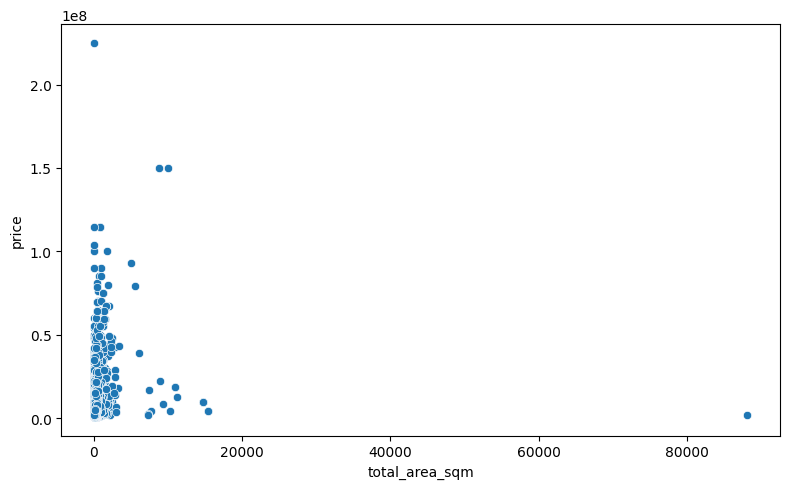

In [57]:
# PRICE VS LIVING AREA
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="total_area_sqm", y="price")
plt.tight_layout()
plt.show()


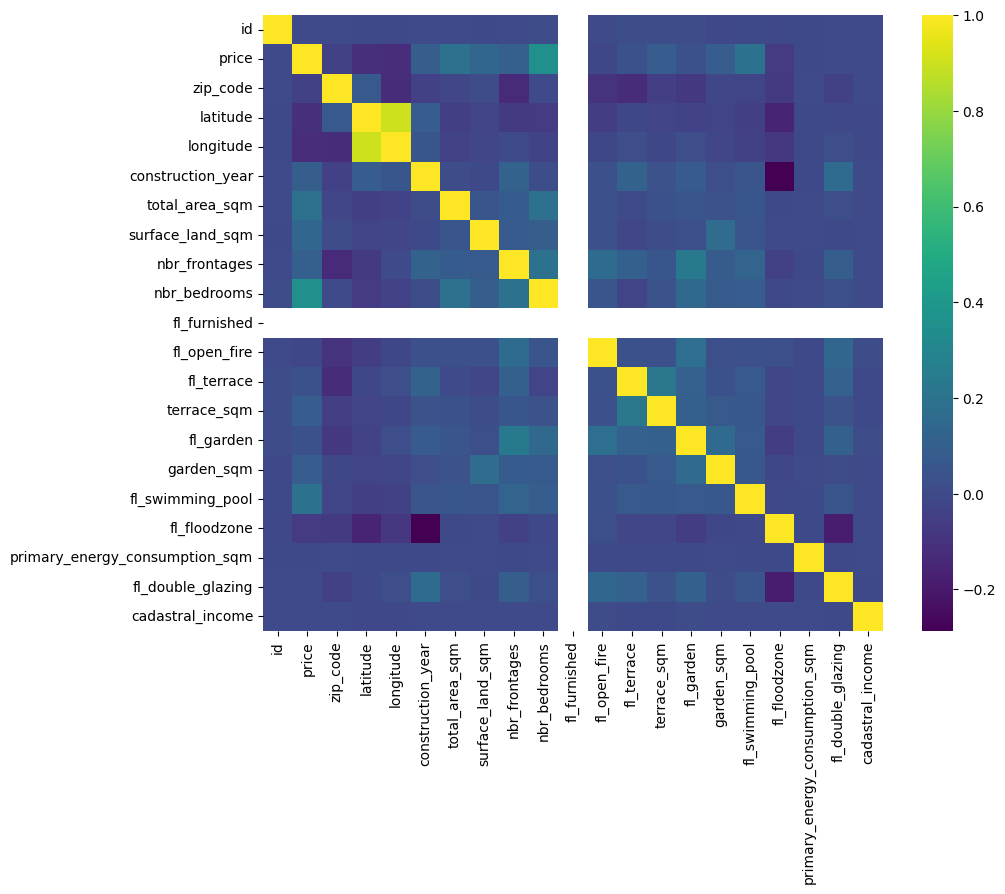

In [58]:
# CORRELATION HEATMAP
numeric = df.select_dtypes(include="number")

plt.figure(figsize=(10,8))
sns.heatmap(numeric.corr(), annot=False, cmap="viridis")
plt.show()  

In [31]:
# MAP
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "vscode"  # VS Code native renderer
pio.renderers.default = "notebook_connected"

fig = px.scatter_map(
    df,
    lat="latitude",
    lon="longitude",
    color="price",
    zoom=7,
)
fig.show()


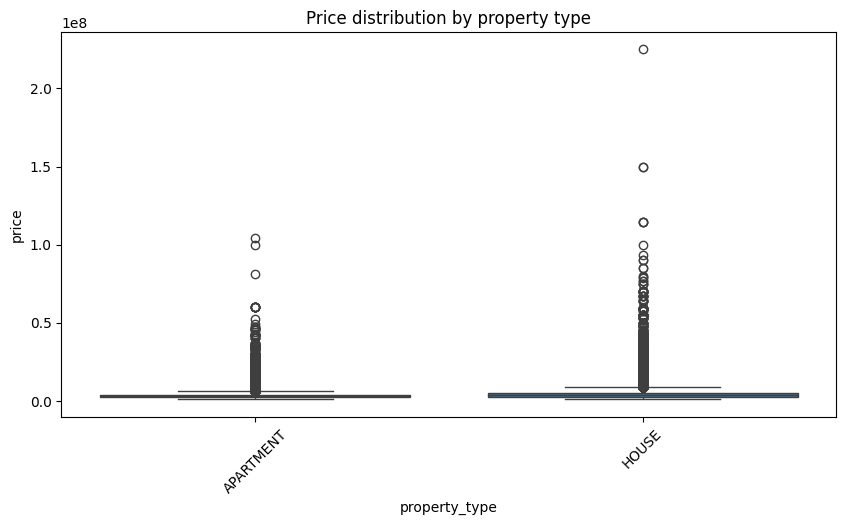

In [59]:
# PROPERTY TYPE & SUBTYPE VS PRICE
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="property_type", y="price")
plt.xticks(rotation=45)
plt.title("Price distribution by property type")
plt.show()

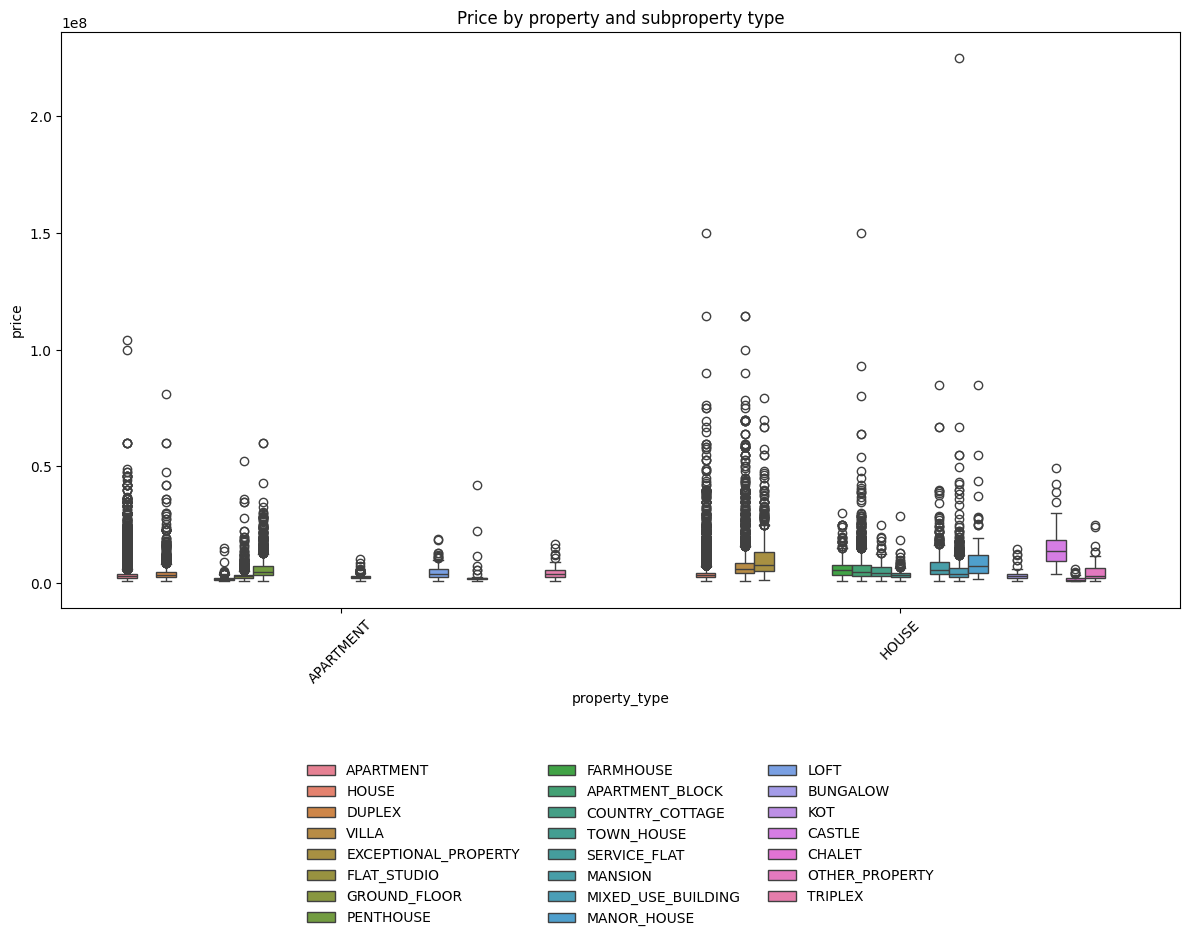

In [60]:
# PER SUBPROPERTY TYPE
plt.figure(figsize=(12,10))
sns.boxplot(data=df, x="property_type", y="price", hue="subproperty_type")
plt.xticks(rotation=45)
plt.title("Price by property and subproperty type")

# Move legend to bottom and wrap to multiple rows
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.25),
    ncol=3,  # pick number of columns per row
    frameon=False
)

plt.tight_layout()
plt.show()


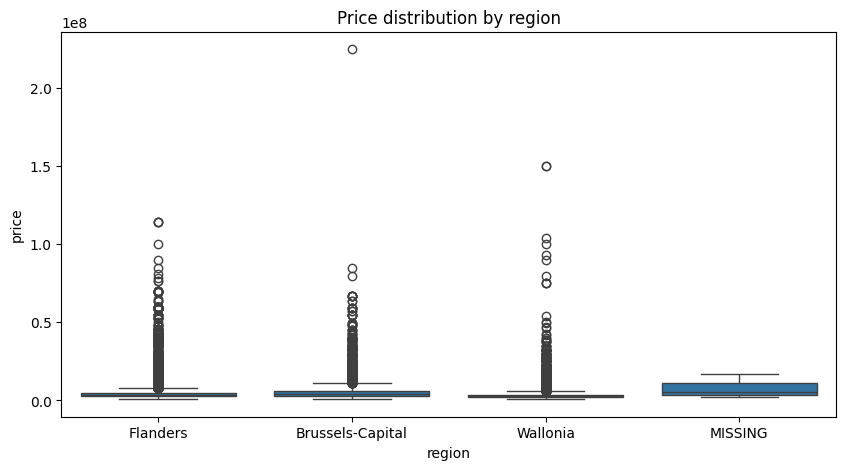

In [61]:
# REGIONAL PRICE DIFFERENCES
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="region", y="price")
plt.title("Price distribution by region")
plt.show()

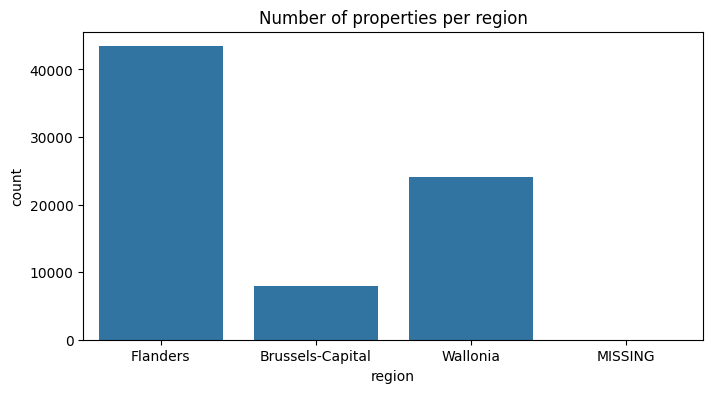

In [62]:
# PROPERTIES PER REGION
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="region")
plt.title("Number of properties per region")
plt.show()

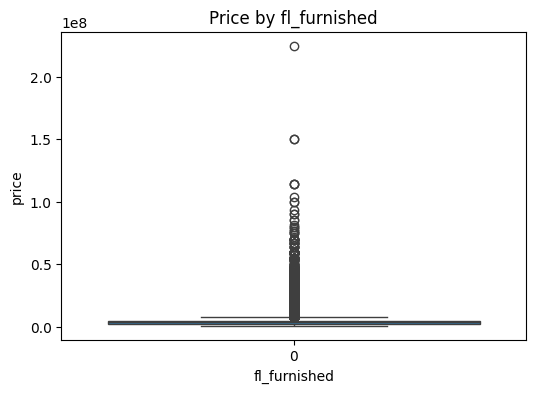

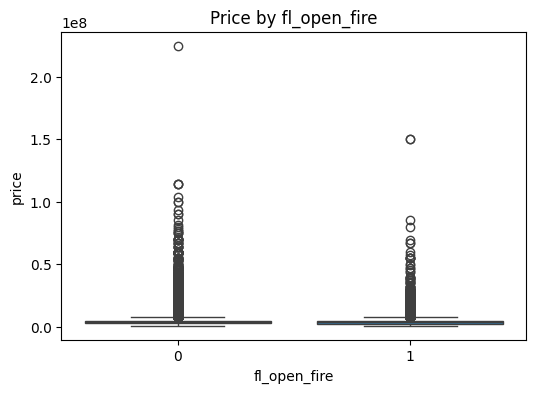

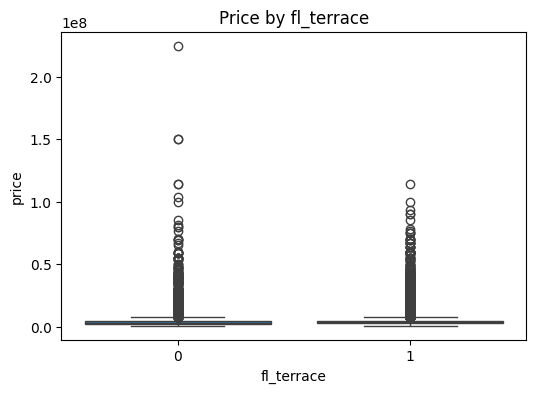

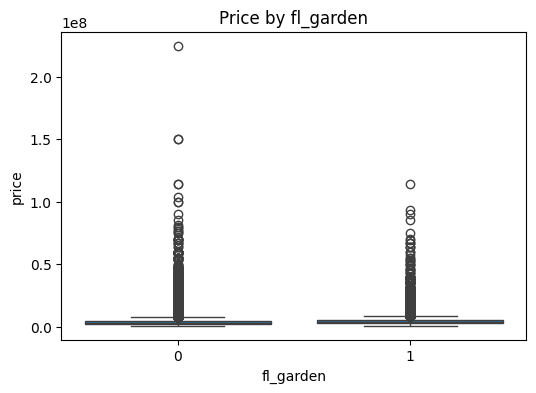

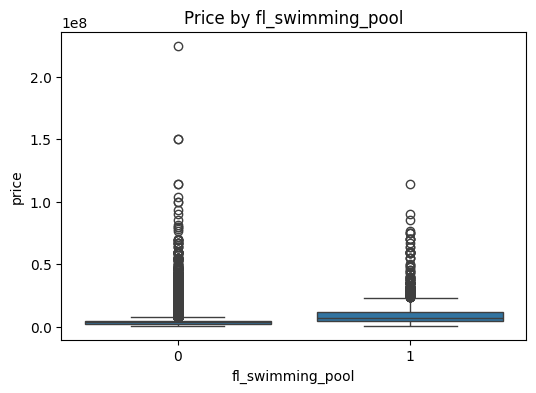

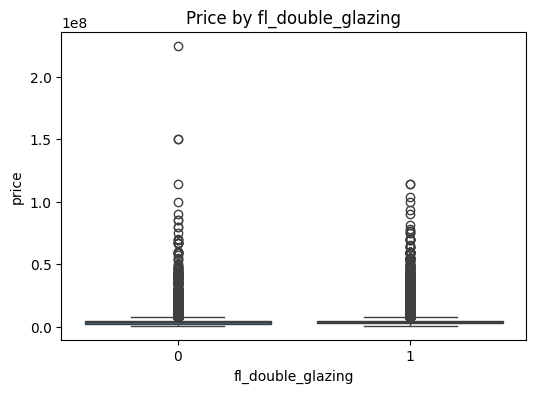

In [63]:
# FEATURES VS PRICE
features = ["fl_furnished", "fl_open_fire", "fl_terrace", "fl_garden", "fl_swimming_pool", "fl_double_glazing"]

for f in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=f, y="price")
    plt.title(f"Price by {f}")
    plt.show()


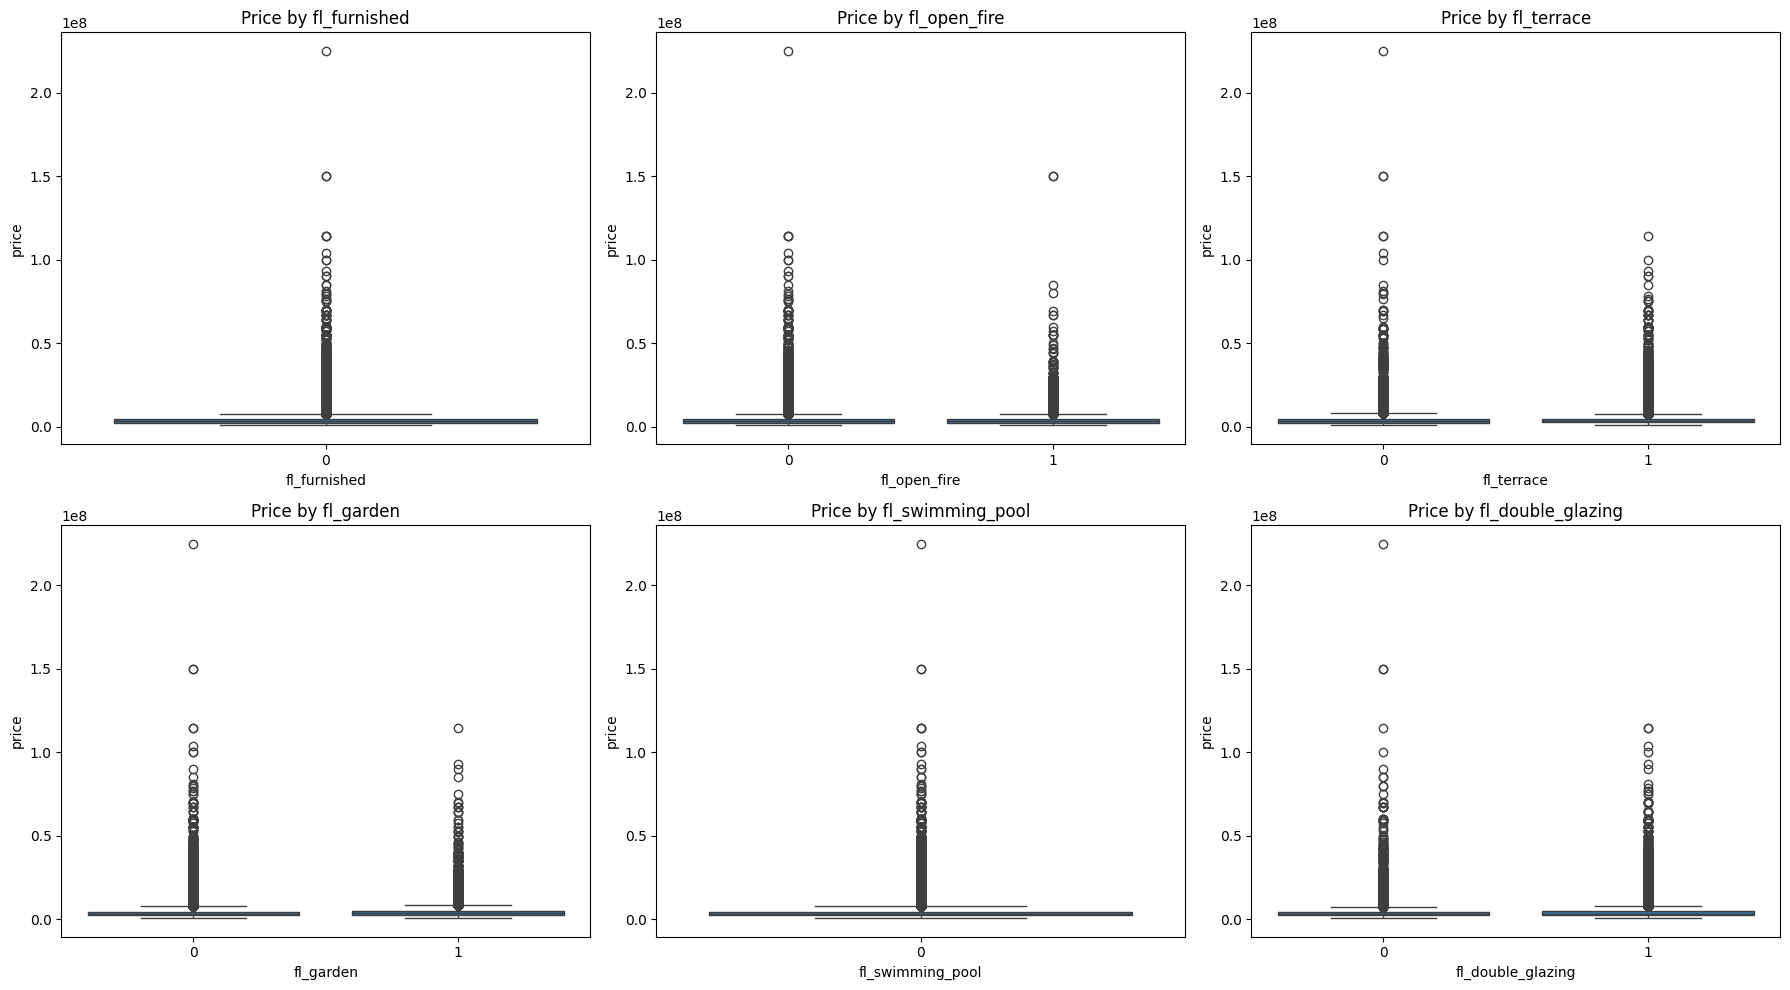

In [ ]:
# COMBINED
import matplotlib.pyplot as plt
import seaborn as sns

features = ["fl_furnished", "fl_open_fire", "fl_terrace", "fl_garden", "fl_swimming_pool", "fl_double_glazing"]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns
axes = axes.flatten()

for ax, f in zip(axes, features):
    sns.boxplot(data=df, x=f, y="price", ax=ax)
    ax.set_title(f"Price by {f}")

plt.tight_layout()
plt.show()


In [ ]:
# EPC VS PRICE
df["epc"].value_counts(dropna=False)
df["epc"].apply(type).value_counts()
df["epc_str"] = df["epc"].astype(str)
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x="epc_str",
    y="price",
    order=sorted(df["epc_str"].unique())  # now safe
)
plt.title("Price by EPC label")
plt.show()


# CHANGED ORDER OF LABELS
# Load data
df = pd.read_csv("../Kristin/cleaned_properties_-1.csv")

# Convert EPC to string, keep NaNs as np.nan
df["epc_str"] = df["epc"].astype(str)
df.loc[df["epc"].isna(), "epc_str"] = pd.NA  # ensure NaNs remain

# Define EPC order (best → worst) and reverse for worst → best
epc_order = ["A++", "A+", "A", "B", "C", "D", "E", "F", "G"]
epc_order = list(reversed(epc_order))  # G → A++

plt.figure(figsize=(8,5))

# Boxplot for EPC values (ignores NaN automatically)
sns.boxplot(
    data=df,
    x="epc_str",
    y="price",
    order=epc_order
)

# Overlay missing EPCs as dots
missing = df[df["epc"].isna()]
plt.scatter(
    x=[len(epc_order)]*len(missing),  # place after last box
    y=missing["price"],
    label='Missing EPC',
    alpha=0.6
)

plt.title("Price by EPC label")
plt.xlabel("EPC Label")
plt.ylabel("Price (€)")

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# CONSTRUCTION YEAR VS PRICE
sns.lmplot(
    data=df,
    x="construction_year",
    y="price",
    lowess=True,
    height=5,
    aspect=2
)

plt.title("Price vs Construction Year")
plt.xlabel("Construction Year")
plt.ylabel("Price (€)")
plt.show()

In [ ]:
# CADASTRAL INCOME VS PRICE
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="cadastral_income", y="price", alpha=0.5)
plt.title("Price vs Cadastral Income")
plt.show()

In [ ]:
# BEDROOMS / FRONTAGES VS PRICE
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="nbr_bedrooms", y="price")
plt.title("Price by number of bedrooms")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="nbr_frontages", y="price")
plt.title("Price by number of frontages")

plt.show()